<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

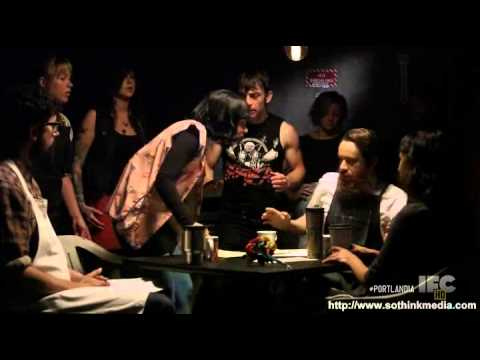

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\navo1\\Desktop\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [14]:
# Base
from collections import Counter
import re
 
import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_lg")

In [48]:
#What does a review have
shops['full_review_text'][0]

' 11/25/2016 1 check-in Love love loved the atmosphere! Every corner of the coffee shop had its own style, and there were swings!!! I ordered the matcha latte, and it was muy fantastico! Ordering and getting my drink were pretty streamlined. I ordered on an iPad, which included all beverage selections that ranged from coffee to wine, desired level of sweetness, and a checkout system. I got my latte within minutes!  I was hoping for a typical heart or feather on my latte, but found myself listing out all the possibilities of what the art may be. Any ideas? '

In [49]:
#Clean white spaces, dates, and make it lower case, and check-in

def clean(df):
    """Function to clean data for NLP analysis"""
    
    df = df.copy()
    # Remove leading and trailing white space
    df['full_review_text'] = df['full_review_text'].apply(lambda x: x.strip())
    
    # Move dates in reviews to new column
    df['review_date'] = df['full_review_text'].apply(lambda x: x.split()[0])
    
    # Remove dates from review text
    df['full_review_text'] = df['full_review_text'].apply(lambda x: ' '.join(x.split()[1:]))
    
    # Remove check-ins from review text
    df['full_review_text'] = df['full_review_text'].apply(lambda x: ' '.join(x.split()[2:])
                                                         if x.split()[1] == 'check-in'
                                                         or x.split()[1] == 'check-ins'
                                                         else x)
    
    # Convert review text to lowercase
    df['full_review_text'] = df['full_review_text'].apply(lambda x: x.lower())
    
    # Remove text from star rating and convert rating to int
    df['star_rating'] = df['star_rating'].apply(lambda x: x.split('.')[0]).astype('int')
    
    df['coffee_shop_name'] = df['coffee_shop_name'].str.strip()
    
    return df

In [50]:
shops = clean(shops)
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,review_date
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5,"[ , 11/25/2016, 1, check-in, love, love, loved...",11/25/2016
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4,"[ , 12/2/2016, listed, date, night:, austin,, ...",12/2/2016
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4,"[ , 11/30/2016, 1, check-in, listed, brunch, s...",11/30/2016
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating howe...,2,"[ , 11/25/2016, cool, decor!, good, drinks, ni...",11/25/2016
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4,"[ , 12/3/2016, 1, check-in, located, northcros...",12/3/2016


In [59]:
#Prepare stop words
STOP_WORDS = nlp.Defaults.stop_words.union(['I','i', 'it', "it's", 'it.', 'the', 'this',])

In [61]:
tokens = []

for doc in tokenizer.pipe(shops['full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
shops['tokens'] = tokens

In [62]:
shops.tokens.head()

0    [love, love, loved, atmosphere!, corner, coffe...
1    [listed, date, night:, austin,, ambiance, aust...
2    [listed, brunch, spots, loved, eclectic, homey...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [located, northcross, mall, shopping, center, ...
Name: tokens, dtype: object

In [63]:
#Lemmitization
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [56]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [64]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens,review_date,lemmas
0,The Factory - Cafe With a Soul,love love loved the atmosphere! every corner o...,5,"[love, love, loved, atmosphere!, corner, coffe...",11/25/2016,"[love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"listed in date night: austin, ambiance in aust...",4,"[listed, date, night:, austin,, ambiance, aust...",12/2/2016,"[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,listed in brunch spots i loved the eclectic an...,4,"[listed, brunch, spots, loved, eclectic, homey...",11/30/2016,"[list, brunch, spot, love, eclectic, homey, pl..."
3,The Factory - Cafe With a Soul,very cool decor! good drinks nice seating howe...,2,"[cool, decor!, good, drinks, nice, seating, ho...",11/25/2016,"[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,they are located within the northcross mall sh...,4,"[located, northcross, mall, shopping, center, ...",12/3/2016,"[locate, northcross, mall, shopping, center, f..."


# How do we want to analyze these cofee shop tokens?
    - Overall Word/ Token Count
    - View Counts by rating


In [65]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [67]:
wc = count(shops['lemmas'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
4,coffee,4953,10763,1.0,0.030321,0.030321,0.650341
113,place,3892,6059,2.0,0.017069,0.047391,0.511029
140,good,3614,5437,3.0,0.015317,0.062708,0.474527
58,great,2860,3959,4.0,0.011153,0.073861,0.375525
153,like,2274,3380,5.0,0.009522,0.083383,0.298582


In [68]:
#Overall Word Count
wc.count()

word              14501
appears_in        14501
count             14501
rank              14501
pct_total         14501
cul_pct_total     14501
appears_in_pct    14501
dtype: int64

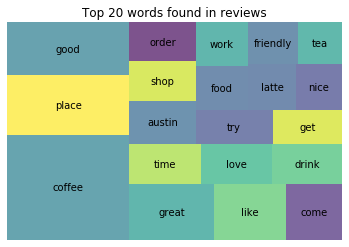

In [69]:
top_20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=top_20['pct_total'], label=top_20['word'], alpha=0.7)
plt.title('Top 20 words found in reviews')
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


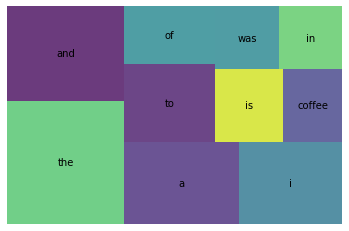

In [35]:
import squarify
import matplotlib.pyplot as plt

wc_top10 = wc[wc['rank']<= 10]

squarify.plot(sizes=wc_top10['pct_total'], label=wc_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

